In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("50_Startups.csv")

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
x = df.iloc[:,0]
y = df.iloc[:,-1]

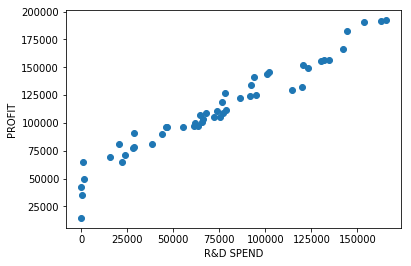

array([[1.        , 0.97290047],
       [0.97290047, 1.        ]])

In [17]:
plt.scatter(x,y)
plt.xlabel("R&D SPEND")
plt.ylabel("PROFIT")
plt.show()
np.corrcoef(x,y)

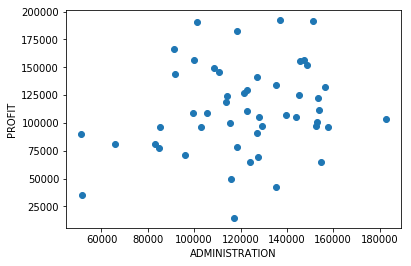

array([[1.        , 0.20071657],
       [0.20071657, 1.        ]])

In [18]:
x_1 = df.iloc[:,1]
y_1 = df.iloc[:,-1]
plt.scatter(x_1,y_1)
plt.xlabel("ADMINISTRATION")
plt.ylabel("PROFIT")
plt.show()
np.corrcoef(x_1,y_1)

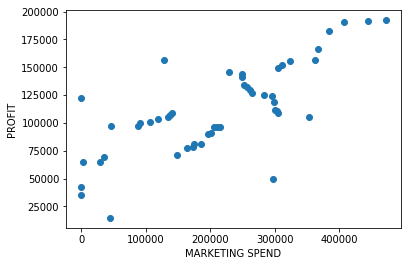

array([[1.        , 0.74776572],
       [0.74776572, 1.        ]])

In [19]:
x_2 = df.iloc[:,2]
y_2 = df.iloc[:,-1]
plt.scatter(x_2,y_2)
plt.xlabel("MARKETING SPEND")
plt.ylabel("PROFIT")
plt.show()
np.corrcoef(x_2,y_2)

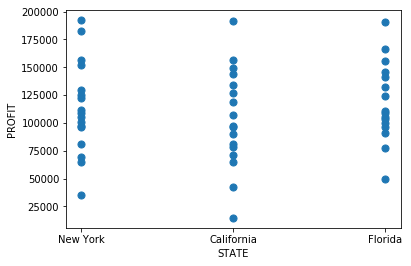

In [26]:
x_3 = df.iloc[:,3]
y_3 = df.iloc[:,-1]
plt.scatter(x_3,y_3,s=50)
plt.xlabel("STATE")
plt.ylabel("PROFIT")
plt.show()

In [29]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [33]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,4].values

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [36]:
label_encoder = LabelEncoder()
X[:,3] = label_encoder.fit_transform(X[:,3])

In [42]:
One_Hot_Encoder = OneHotEncoder(categorical_features = [3])

In [43]:
X = One_Hot_Encoder.fit_transform(X).toarray()

C:\Users\Dinesh-PC\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Dinesh-PC\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [45]:
X = X[:, 1:]

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [48]:
from sklearn.linear_model import LinearRegression
Lm = LinearRegression()

In [49]:
Lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
y_pred = Lm.predict(X_test)

In [51]:
Lm.score(X_test,Y_test)

0.8944322762203785

In [52]:
from sklearn.metrics import r2_score

In [57]:
R2_score = r2_score(Y,Lm.predict(X))
print(R2_score)

0.9485206551676677
